<a href="https://colab.research.google.com/github/ejrtks1020/Deep_learning_library/blob/main/_3_1_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 보스턴 주택 가격 모델

### modules import

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [ ]:
tf.random.set_seed(111)

(x_train_full , y_train_full),  (x_test, y_test) = load_data(path = 'boston_housing.npz',
                                                             test_split = 0.2,
                                                             seed = 111)


65536/57026 [==================================] - 0s 0us/step


### 데이터 확인

In [ ]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


In [ ]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [ ]:
print(y_train_full[0])

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [ ]:
mean = np.mean(x_train_full, axis = 0)
std = np.std(x_train_full, axis = 0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std
x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full, 
                                                  test_size = 0.3,
                                                  random_state = 111)

In [ ]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('검증 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [ ]:
model = Sequential([Dense(100 , activation = 'relu', input_shape = (13, ), name = 'dense1'),
                    Dense(64 ,activation='relu', name = 'dense2'),
                    Dense(32, activation='relu', name = 'dense3'),
                    Dense(1 , name = 'output')])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 100)               1400      
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


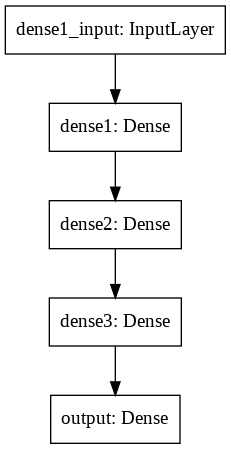

In [ ]:
plot_model(model)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [ ]:
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate=1e-2),
              metrics =['mae'])

### 모델 학습

In [ ]:
history = model.fit(x_train, y_train, epochs=300,
                    validation_data = (x_val ,y_val))

Epoch 1/300
9/9 [==============================] - 1s 23ms/step - loss: 285.1888 - mae: 14.0729 - val_loss: 132.4612 - val_mae: 9.1090
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 60.9891 - mae: 5.9218 - val_loss: 31.4368 - val_mae: 4.4589
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 33.7114 - mae: 4.2293 - val_loss: 22.2753 - val_mae: 3.6017
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 21.5946 - mae: 3.4391 - val_loss: 13.9826 - val_mae: 2.9190
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 16.3538 - mae: 2.8935 - val_loss: 11.7222 - val_mae: 2.7147
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 13.6432 - mae: 2.5889 - val_loss: 10.9746 - val_mae: 2.5883
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 12.6475 - mae: 2.4426 - val_loss: 9.1843 - val_mae: 2.3985
Epoch 8/300
9/9 [==============================] - 0s 4ms/step - loss: 12.5112 -

### 모델 평가 
- `evaluate()`

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 13.8529 - mae: 2.5840


[13.852914810180664, 2.5840232372283936]

In [ ]:
print(history.history.keys()) #학습정보(히스토리)가 딕셔너리 형태로 쌓여져 있음

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


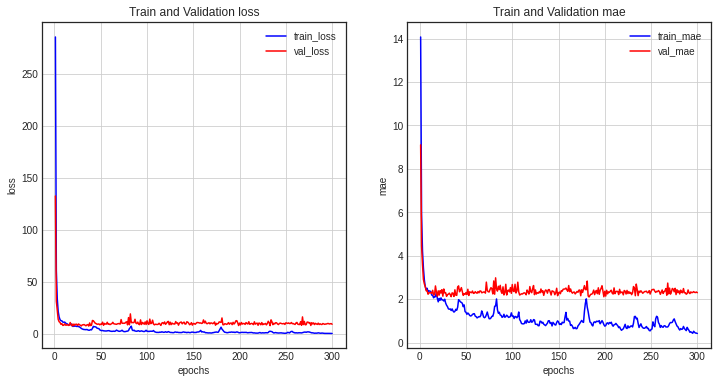

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'red', label = 'val_mae')
ax2.set_title('Train and Validation mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()

plt.show()

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input 
from tensorflow.keras.models import Model

In [ ]:
tf.random.set_seed(111)

(x_train_full , y_train_full),  (x_test, y_test) = load_data(path = 'boston_housing.npz',
                                                             test_split = 0.2,
                                                             seed = 111)

mean = np.mean(x_train_full, axis = 0)
std = np.std(x_train_full, axis = 0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std
x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full, 
                                                  test_size = 0.3,
                                                  random_state = 111)

In [ ]:
k = 3

kfold = KFold(n_splits= k , random_state = 111)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
def build_model():
  input = Input(shape = (13, ), name ='input')
  hidden1 = Dense(100 , activation = 'relu', name = 'dense1')(input)
  hidden2 = Dense(64 ,activation='relu', name = 'dense2')(hidden1)
  hidden3 = Dense(32, activation='relu', name = 'dense3')(hidden2)
  output = Dense(1 , name = 'output')(hidden3)

  model = Model(inputs = [input], outputs = output)
  model.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['mae'])
  
  return model


In [ ]:
mae_list = []

In [ ]:
for train_idx, val_idx in kfold.split(x_train_preprocessed):
  x_train_fold , x_val_fold = x_train_preprocessed[train_idx], x_train_preprocessed[val_idx]
  y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx]

  model = build_model()
  model.fit(x_train_fold, y_train_fold, epochs  =300,
            validation_data = (x_val_fold, y_val_fold))
  _, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 1s 18ms/step - loss: 537.0161 - mae: 21.4474 - val_loss: 605.7798 - val_mae: 22.5391
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 497.2296 - mae: 20.5105 - val_loss: 554.0231 - val_mae: 21.4083
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 441.5983 - mae: 19.1574 - val_loss: 473.5671 - val_mae: 19.5144
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 354.3128 - mae: 16.8218 - val_loss: 349.2275 - val_mae: 16.3432
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 235.8078 - mae: 13.2664 - val_loss: 196.7516 - val_mae: 11.6609
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 119.8469 - mae: 9.0683 - val_loss: 93.1005 - val_mae: 7.6818
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 68.7341 - mae: 6.7501 - val_loss: 76.9368 - val_mae: 6.9607
Epoch 8/300
9/9 [==============================] - 0s 7ms/ste

In [ ]:
print(mae_list)

[2.839651346206665, 2.8895013332366943, 2.873504638671875]


In [ ]:
print(np.mean(mae_list)) #각 fold에서 모델은 평균적으로 실제 주택가격과 2860달러정도 오차가 존재

2.8675524393717446
